**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



**Set global variables**

In [2]:
txt_fdiry = file.path(FD_RES, "region_coverage_fcc")
vec = dir(txt_fdiry)
for (txt in vec) {cat(txt, "\n")}

atac_ENCFF333TAT 
atac_ENCFF558BLC 
atac_ENCFF925CYR 
atac_ENCFF948AFM 
dnase_ENCFF185XRG 
dnase_ENCFF274YGF 
fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


In [3]:
txt_region = "fcc_astarr_macs_input_union"
txt_fdiry  = file.path(FD_RES, "region_coverage_fcc", txt_region)
vec = dir(txt_fdiry)
for (txt in vec) {cat(txt, "\n")}

CRISPRi_FlowFISH_K562_Riley_JinWoo 
CRISPRi_Growth_K562_Gersbach_JinWoo 
MPRA_Lenti_K562_Nadav_Vikram 
MPRA_Tiling_K562_Tewhey_Hannah 
STARR_ATAC_K562_Reddy_KS274 
STARR_ATAC_K562_Reddy_KS91 
STARR_ATAC_K562_Reddy_KSMerge 
STARR_WHG_K562_Reddy_A001 
summary 


In [4]:
#txt_fdiry = file.path(FD_RES, "region_coverage_fcc")
#vec = dir(txt_fdiry)
vec = c("fcc_astarr_macs_input_overlap", "fcc_astarr_macs_input_union")
names(vec) = vec

VEC_TXT_REGION = vec
for (txt in vec) {cat(txt, "\n")}

fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


## Import data

In [5]:
lst = lapply(VEC_TXT_REGION, function(txt_region){
    ### set file directory
    txt_fdiry  = file.path(
        FD_RES, 
        "region_coverage_fcc", 
        txt_region, 
        "summary"
    )
    txt_fname = "result.coverage.score.final.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_score_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 432928      9

$fcc_astarr_macs_input_union
[1] 639718      9



Chrom,ChromStart,ChromEnd,Region,Score,Assay_Name,Assay_Type,Assay_Group,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
chr11,4092109,4092511,chr11:4092109-4092511,-0.4446170,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH
chr11,4094223,4095304,chr11:4094223-4095304,-0.2302549,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH
chr11,4144721,4147004,chr11:4144721-4147004,-0.2878661,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH


In [17]:
lst = lst_dat_region_score_import 
dat = lst[["fcc_astarr_macs_input_union"]]

dat_peak_atac_fcc_total = dat
print(dim(dat))
table(dat$Assay_Type,dat$Assay_Group)

[1] 639718      9


                
                 ASTARR_KS91 CRISPRi-Growth CRISPRi-HCRFF  LMPRA  TMPRA WSTARR
  ASTARR              246850              0             0      0      0      0
  CRISPRi-Growth           0          80288             0      0      0      0
  CRISPRi-HCRFF            0              0          1330      0      0      0
  LMPRA                    0              0             0  68497      0      0
  TMPRA                    0              0             0      0   1722      0
  WSTARR                   0              0             0      0      0 241031

In [18]:
vec = c("ASTARR", "WSTARR", "TMPRA", "LMPRA", "ATAC")
lst = lst_dat_region_score_import 
dat = lst[["fcc_astarr_macs_input_union"]]
dat = dat %>% dplyr::filter(Assay_Type %in% vec)
res = table(dat$Assay_Type)
print(res)


ASTARR  LMPRA  TMPRA WSTARR 
246850  68497   1722 241031 


ASTARR  LMPRA  TMPRA WSTARR 
246850  68420   1722 246688 

In [9]:
lst = lst_dat_region_score_import 
dat = lst[["fcc_astarr_macs_input_union"]]

lst = split(dat, dat$Assay_Type)
print(names(lst))
dat_peak_total_crispri_hcrff  = lst[["CRISPRi-HCRFF"]]
dat_peak_total_crispri_growth = lst[["CRISPRi-Growth"]]

dat = dat_peak_total_crispri_hcrff
print(dim(dat))

dat = dat_peak_total_crispri_growth
print(dim(dat))

[1] "ASTARR"         "CRISPRi-Growth" "CRISPRi-HCRFF"  "LMPRA"         
[5] "TMPRA"          "WSTARR"        
[1] 1330    9
[1] 80288     9


In [12]:
dat = dat_peak_total_crispri_hcrff
head(dat)

Chrom,ChromStart,ChromEnd,Region,Score,Assay_Name,Assay_Type,Assay_Group,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
chr11,4092104,4092566,chr11:4092104-4092566,-0.4800155,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH
chr11,4094204,4095676,chr11:4094204-4095676,-0.2046389,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH
chr11,4144511,4147030,chr11:4144511-4147030,-0.2753264,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH
chr11,4167268,4168022,chr11:4167268-4168022,-0.3613763,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH
chr11,4181723,4182583,chr11:4181723-4182583,-0.2445883,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH
chr11,4186880,4188018,chr11:4186880-4188018,-0.3477101,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH


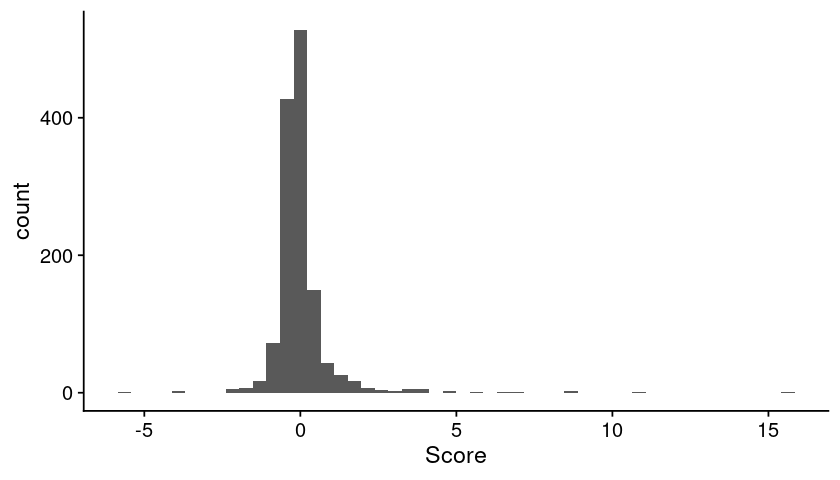

In [10]:
dat = dat_peak_total_crispri_hcrff
gpt = ggplot(dat, aes(x=Score)) + geom_histogram(bins = 50) + theme_cowplot()

options(repr.plot.height=4, repr.plot.width=7)
print(gpt)

In [13]:
dat = dat_peak_total_crispri_hcrff
dat = dat %>% 
    dplyr::mutate(
        CRISPRi_Label = ifelse(
            abs(Score) >= 1,
            "CRISPRi Hit",
            "Background"
    )) %>%
    dplyr::select(Region, CRISPRi_Label)

dat_peak_label_crispri_hcrff = dat
print(dim(dat))
head(dat)

[1] 1330    2


Region,CRISPRi_Label
<chr>,<chr>
chr11:4092104-4092566,Background
chr11:4094204-4095676,Background
chr11:4144511-4147030,Background
chr11:4167268-4168022,Background
chr11:4181723-4182583,Background
chr11:4186880-4188018,Background


In [20]:
dat = dat_peak_atac_fcc_total
lst = split(dat, dat$Assay_Type)

txt = "WSTARR"
dat = lst[[txt]]
dat = dat %>% dplyr::right_join(dat_peak_label_crispri_hcrff, by="Region")

head(dat)

Chrom,ChromStart,ChromEnd,Region,Score,Assay_Name,Assay_Type,Assay_Group,Assay_Label,CRISPRi_Label
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
chr11,4092104,4092566,chr11:4092104-4092566,0.95545769,STARR_WHG_K562_Reddy_A001,WSTARR,WSTARR,WHG-STARR,Background
chr11,4094204,4095676,chr11:4094204-4095676,2.10411931,STARR_WHG_K562_Reddy_A001,WSTARR,WSTARR,WHG-STARR,Background
chr11,4144511,4147030,chr11:4144511-4147030,-0.03008522,STARR_WHG_K562_Reddy_A001,WSTARR,WSTARR,WHG-STARR,Background
chr11,4167268,4168022,chr11:4167268-4168022,-0.52448939,STARR_WHG_K562_Reddy_A001,WSTARR,WSTARR,WHG-STARR,Background
chr11,4181723,4182583,chr11:4181723-4182583,-0.12992407,STARR_WHG_K562_Reddy_A001,WSTARR,WSTARR,WHG-STARR,Background
chr11,4186880,4188018,chr11:4186880-4188018,0.74913660,STARR_WHG_K562_Reddy_A001,WSTARR,WSTARR,WHG-STARR,Background


Warning message:
“Removed 24 rows containing non-finite outside the scale range (`stat_boxplot()`).”


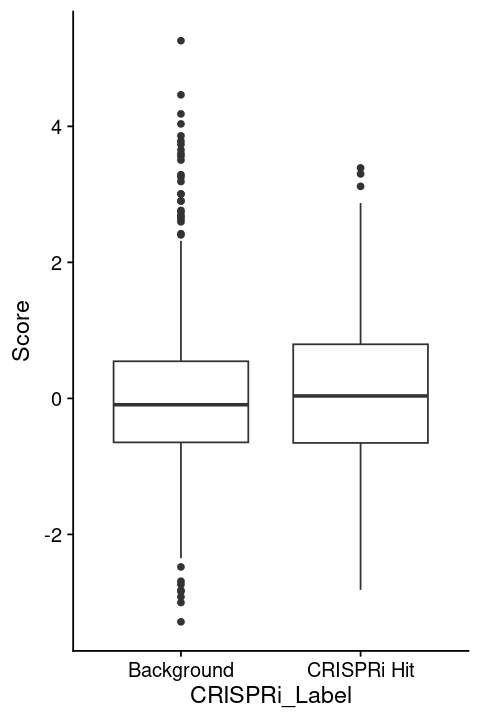

In [21]:
gpt = ggplot(dat, aes(x=CRISPRi_Label, y=Score)) + geom_boxplot() + theme_cowplot()

options(repr.plot.height=6, repr.plot.width=4)
print(gpt)

In [22]:
fun_auroc = function(vec_boo_actual, vec_num_score) {
    ###
    idx = order(vec_num_score)
    vec = vec_boo_actual[idx]
    
    ###
    vec_num_sens = (sum(vec) - cumsum(vec))/sum(vec)
    vec_num_spec = cumsum(!vec)/sum(!vec)
    
    ###
    num_width = diff(c(0, 1 - vec_num_sens))
    num_auc   = sum(vec_num_spec * num_width)

    ### 
    lst = list(
        "Specificity" = vec_num_spec,
        "Sensitivity" = vec_num_sens,
        "AUROC"       = num_auc
    )
    return(lst)
}

In [25]:
dat = bind_rows(dat_peak_atac_fcc_total)

lst = split(dat, dat$Assay_Type)
vec = c("ASTARR", "WSTARR", "TMPRA", "LMPRA", "ATAC")
lst = lst[vec]

lst = lapply(lst, function(dat){
    
    #txt = "CRISPRi-HCRFF"
    #vec = paste(txt, c("I", "A"), sep="_")
    vec = c("Background", "CRISPRi Hit")
    dat = dat %>% 
        dplyr::inner_join(dat_peak_label_crispri_hcrff, by="Region") %>%     
        dplyr::mutate(CRISPRi_Label = factor(CRISPRi_Label, levels = vec))
    
    fit = glm(CRISPRi_Label ~ Score, data = dat, family = "binomial")
    vec_boo_actual = (dat$CRISPRi_Label == "CRISPRi Hit")
    vec_num_score = predict(fit, type = "response")

    lst = fun_auroc(vec_boo_actual, vec_num_score)
    vec_num_spec = lst[["Specificity"]]
    vec_num_sens = lst[["Sensitivity"]]
    num_auroc    = lst[["AUROC"]]
    txt_assay    = unique(dat$Assay_Type)

    txt_title = paste0("(", round(num_auroc, 2), ")")
    txt_title = paste(txt_assay, txt_title)
    
    dat = data.frame(
        "x" = 1 - lst[["Specificity"]],
        "y" = lst[["Sensitivity"]],
        "Assay" = txt_assay,
        "AUROC" = num_auroc,
        "Performance" = txt_title
    )
    dat = dat %>% dplyr::arrange(x, y)
    return(dat)
})


dat = bind_rows(lst)
gpt = ggplot(dat, aes(x=x, y=y, group=Assay, color=Performance)) +
    geom_line(linewidth=1) +
    #geom_point() +
    labs(x = "1 - Specificity", y = "Sensitivity") +
    theme_cowplot()

options(repr.plot.width=7, repr.plot.height=5)
print(gpt)

ERROR: Error in UseMethod("inner_join"): no applicable method for 'inner_join' applied to an object of class "NULL"
